# COVID-19 Analysis



Data Source (https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data)


In [29]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

In [28]:
# read csv files

d_wise = pd.read_csv(r"C:\Users\ruvim\Downloads\archive (57)\day_wise.csv")
f_grouped = pd.read_csv(r"C:\Users\ruvim\Downloads\archive (57)\full_grouped.csv")
covid_19 = pd.read_csv(r"C:\Users\ruvim\Downloads\archive (57)\covid_19_clean_complete.csv")
c_wise = pd.read_csv(r"C:\Users\ruvim\Downloads\archive (57)\country_wise_latest.csv")

#view data frames


display(d_wise.head(1))
display(f_grouped.head(1))
display(covid_19.head(1))
display(c_wise.head(1))

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean


In [11]:
#geographical plot

fig = px.scatter_map(
    covid_19,
    lat="Lat",
    lon="Long",
    width=600,
    height=600,
    title="World Distribution of COVID-19 Cases",
    hover_data=["WHO Region"]
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

According to the Map, it is seen that the African Region has the most number of countries affected by the COVID-19 Pandemic.

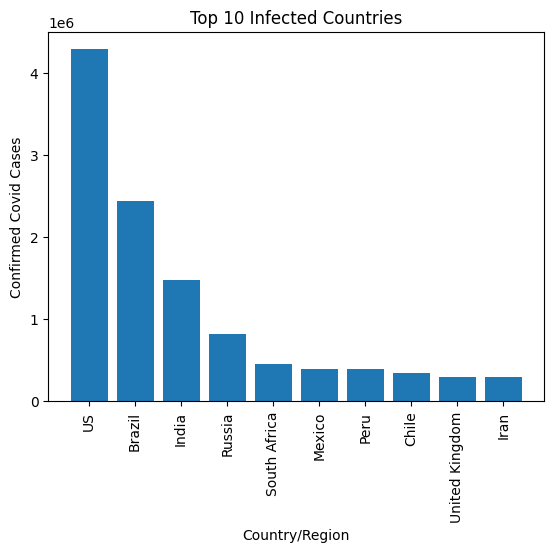

In [ ]:
#top 10 countries with confirmed covid cases
top_10 = c_wise.sort_values(by="Confirmed",ascending=False).head(10)

plt.bar(top_10["Country/Region"], top_10["Confirmed"])
plt.xlabel("Country/Region")
plt.ylabel("Confirmed Covid Cases")
plt.title("Top 10 Infected Countries")
plt.xticks(rotation=90)  
plt.show()


Top 10 countries with confirmed COVID-19 cases. America being number one.

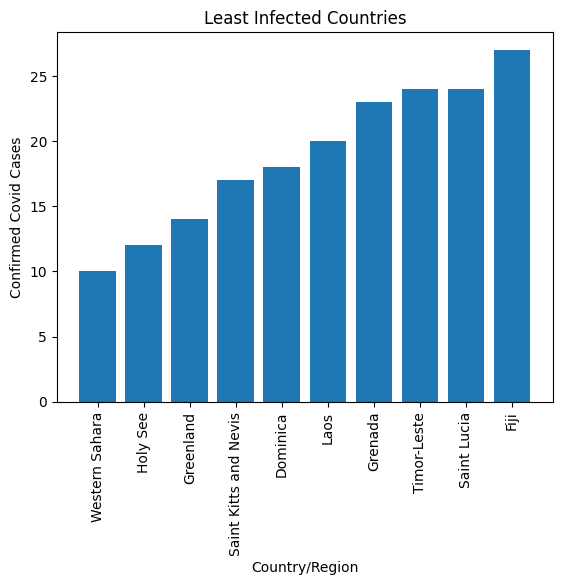

In [ ]:
#top 10 countries with confirmed covid cases
bottom_10 = c_wise.sort_values(by="Confirmed").head(10)

plt.bar(bottom_10["Country/Region"], bottom_10["Confirmed"])
plt.xlabel("Country/Region")
plt.ylabel("Confirmed Covid Cases")
plt.title("Least Infected Countries")
plt.xticks(rotation=90)  
plt.show()

Bottom 10 countries affected by the COVID-19 Pandemic with Western Sahara being the least affected in the WHO Region.

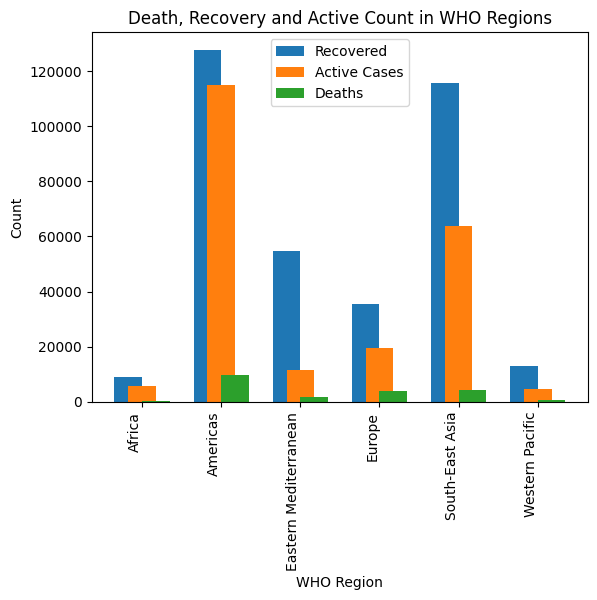

In [ ]:

# Group by "WHO Region" and calculate the mean for both metrics
who_grouped = c_wise.groupby("WHO Region")[["Recovered", "Deaths", "Active"]].mean()

# Define the positions and width for the bars
x = np.arange(len(who_grouped))
width = 0.35

fig, ax = plt.subplots()

# Plot the bars
bars1 = ax.bar(x - width/2, who_grouped["Recovered"], width, label='Recovered')
bars2 = ax.bar(x, who_grouped["Active"], width, label='Active Cases')
bars3 = ax.bar(x + width/2, who_grouped["Deaths"], width, label='Deaths')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel("WHO Region")
ax.set_ylabel("Count")
ax.set_title("Death, Recovery and Active Count in WHO Regions")
ax.set_xticks(x)
ax.set_xticklabels(who_grouped.index, rotation=90, ha='right')
ax.legend()

plt.show()


The Americas and South-East-Asia Region have the highest counts in Recovered cases both exceeding 100,000 recovered cases, however Africa had the least recovered cases not exceeding 20,000.
The same case also applies to the Americas as well as the South-East-Asia region as they have the highest number of active cases and death cases whilst Western Pacific has the lowest actice cases and Africa with the lowest death cases.

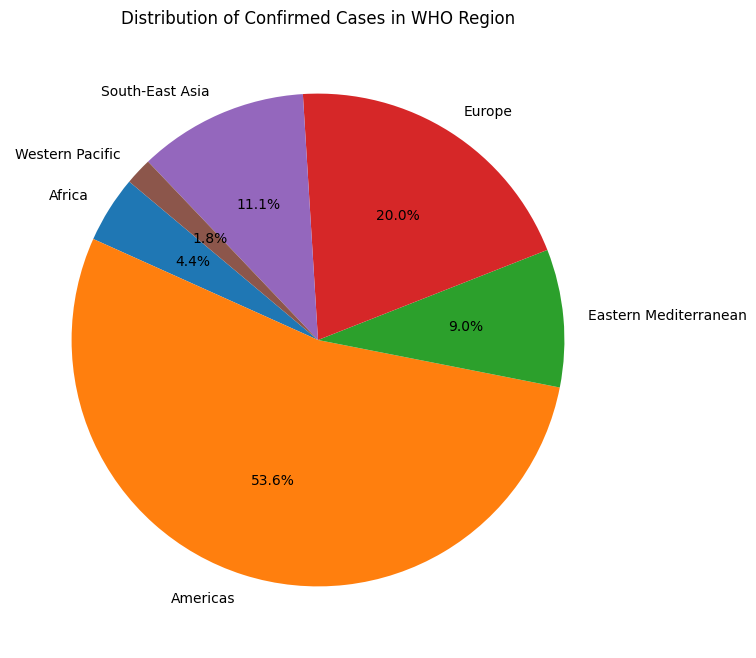

In [33]:
c_region = c_wise.groupby("WHO Region")["Confirmed"].sum()

plt.figure(figsize=(8, 8))
plt.pie(c_region, labels=c_region.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Confirmed Cases in WHO Region")
plt.show()

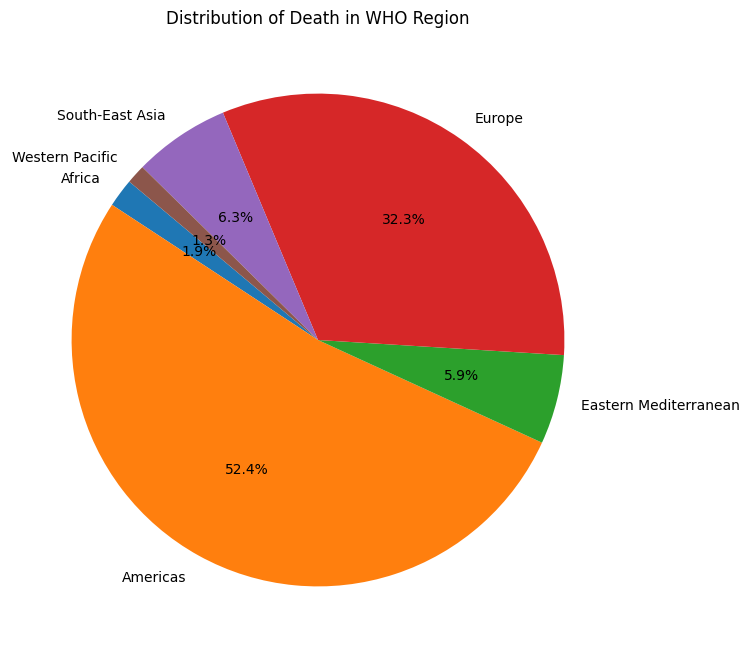

In [15]:
deaths_by_region = c_wise.groupby("WHO Region")["Deaths"].sum()

plt.figure(figsize=(8, 8))
plt.pie(deaths_by_region, labels=deaths_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Death in WHO Region")
plt.show()

In the entire WHO Region, the Americas takes up just over half the total percentage in death cases.

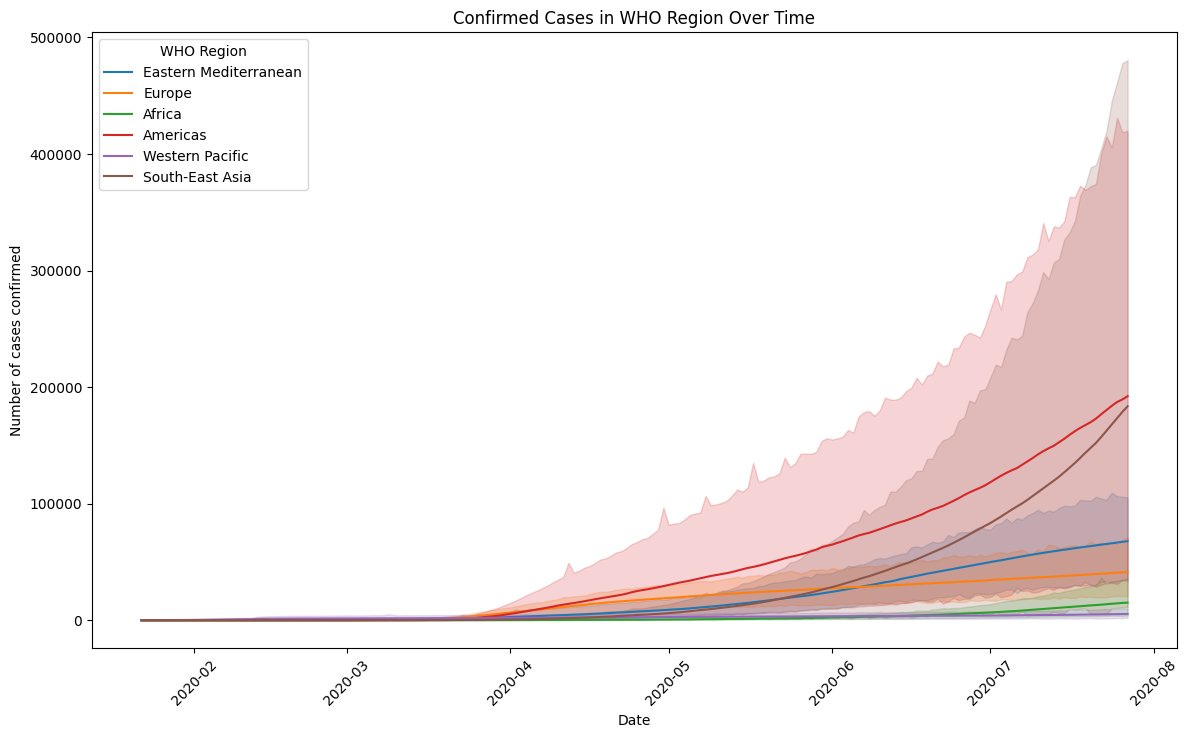

In [27]:
plt.figure(figsize=(14, 8))
sns.lineplot(x="Date", y="Confirmed", hue="WHO Region", data=covid_19)
plt.xlabel("Date")
plt.ylabel("Number of cases confirmed") 
plt.title("Confirmed Cases in WHO Region Over The Year") 
plt.xticks(rotation=45);

Over a year we see a gradual increase in confirmed cases in the Americas and South-East-Asia region whilst regions like Western Pacific and Africa able to keep it at bay.

# CONCLUSION

The Americas and the South-East-Asia have the highest number of Confirmed cases, Recovered cases, this could indicate a successful implementation of recovery efforts in their healthcare systems.

Africa accounts for only 4.4% in confirmed COVID-19 cases. This could be due to the early strict proactive measure that were taken by African countries such as lockdown and travel restrictions. Another reason could be the lack healthcare infrastructure that might have hindered comprehensive testing and reporting.

While the recovery rate in the Americas and South-East-Asia region is high, these regions showcase high death rate. This simply means that as much as they have implemented high levels of recovery efforts, these efforts were not sufficient enough to halt spread of the virus.

However, it is important to note that the data collection and reporting practices can affect the percieved recovery and death rates. Some regions may underreport or overreport leading to amisinformed analyses.